In [14]:
import requests
import json
import time
import pandas as pd
from prophet import Prophet

/Users/hassanraha/.pyenv/versions/3.8.8/envs/forecast/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [15]:
result = json.loads(requests.get('http://172.16.2.95:9090/api/v1/query_range?query=100+-+rate%28node_cpu_seconds_total%7Bmode%3D%22idle%22%7D%5B1m%5D%29+*+100&start=1657338645.1520176&end=1657425045.1520176&step=15').text)
data = result['data']['result'][0]['values']

In [16]:
data_1 = [[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(i[0])),i[1]] for i in data]

In [17]:
df=pd.DataFrame(data_1,columns=['ds','y'])
df

,ds,y
0,2022-07-09 19:08:15,59.453938888888146
1,2022-07-09 19:08:30,34.53727222222204
2,2022-07-09 19:08:45,0.35555555555522744
3,2022-07-09 19:09:00,1.266666666667021
4,2022-07-09 19:09:15,1.288888888888735
...,...,...
3046,2022-07-10 07:49:45,0.6000000000031918
3047,2022-07-10 07:50:00,0.563636363632142
3048,2022-07-10 07:50:15,0.5818181818176669
3049,2022-07-10 07:50:30,0.5818181818176669


00:13:23 - cmdstanpy - INFO - Chain [1] start processing
00:13:23 - cmdstanpy - INFO - Chain [1] done processing


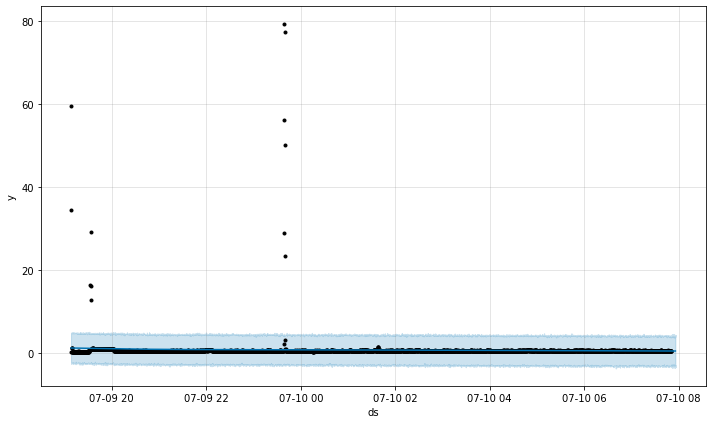

In [22]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='s')
fcst = m.predict(future)
fig = m.plot(fcst)

In [23]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-09 19:08:15,1.208797,-2.593538,4.943805,1.208797,1.208797,0.0,0.0,0.0,0.0,0.0,0.0,1.208797
1,2022-07-09 19:08:30,1.207980,-2.364740,4.902499,1.207980,1.207980,0.0,0.0,0.0,0.0,0.0,0.0,1.207980
2,2022-07-09 19:08:45,1.207163,-2.255594,4.745627,1.207163,1.207163,0.0,0.0,0.0,0.0,0.0,0.0,1.207163
3,2022-07-09 19:09:00,1.206346,-2.285780,4.810346,1.206346,1.206346,0.0,0.0,0.0,0.0,0.0,0.0,1.206346
4,2022-07-09 19:09:15,1.205528,-2.284067,4.805330,1.205528,1.205528,0.0,0.0,0.0,0.0,0.0,0.0,1.205528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2022-07-10 07:55:41,0.488829,-3.146984,4.116037,0.488829,0.488829,0.0,0.0,0.0,0.0,0.0,0.0,0.488829
3347,2022-07-10 07:55:42,0.488818,-3.068202,4.313052,0.488818,0.488818,0.0,0.0,0.0,0.0,0.0,0.0,0.488818
3348,2022-07-10 07:55:43,0.488808,-3.120248,4.153781,0.488808,0.488808,0.0,0.0,0.0,0.0,0.0,0.0,0.488808
3349,2022-07-10 07:55:44,0.488797,-3.102347,4.150748,0.488797,0.488797,0.0,0.0,0.0,0.0,0.0,0.0,0.488797


In [13]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 2.9 MB/s eta 0:00:00
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 7.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━